In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import xarray as xr
import os

from collections import defaultdict

from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte

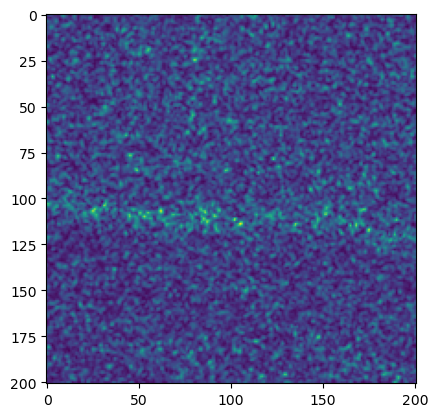

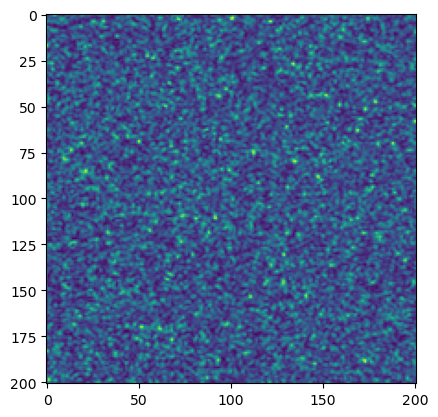

In [2]:
noland_ds = xr.open_dataset('./out/homogenuity/noland/0.nc')
for sigma0 in noland_ds.sigma0.transpose("pol", ...):   
    plt.imshow(sigma0)
    plt.show()

/Users/brobeck/opt/anaconda3/envs/gclm/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


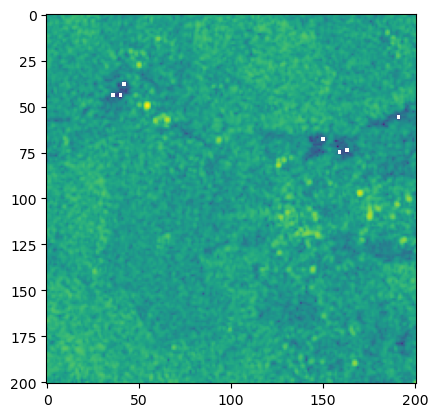

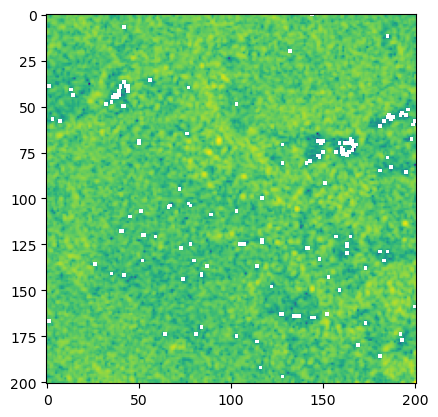

In [3]:
land_ds = xr.open_dataset('./out/homogenuity/land/1.nc')
for sigma0 in land_ds.sigma0.transpose("pol", ...):   
    plt.imshow(10 * np.log10(sigma0))
    plt.show()

In [4]:
land_dir = './out/homogenuity/land/'
land_patches = []

for file_name in os.listdir(land_dir):
    if not file_name.endswith('.nc'): continue
            
    land_ds = xr.open_dataset(land_dir + file_name)
    for sigma0 in land_ds.sigma0.transpose("pol", ...):   
        land_patches.append(sigma0.values)

In [5]:
noland_dir = './out/homogenuity/noland/'
noland_patches = []

for file_name in os.listdir(noland_dir):
    if not file_name.endswith('.nc'): continue
            
    noland_ds = xr.open_dataset(noland_dir + file_name)
    for sigma0 in noland_ds.sigma0.transpose("pol", ...):   
        noland_patches.append(sigma0.values)

/var/folders/_9/vvqgylds56j6qt35q29hhlpm0000gn/T/ipykernel_42056/3387943184.py:2: RuntimeWarning: invalid value encountered in log10
  plt.imshow(10 * np.log10(img))


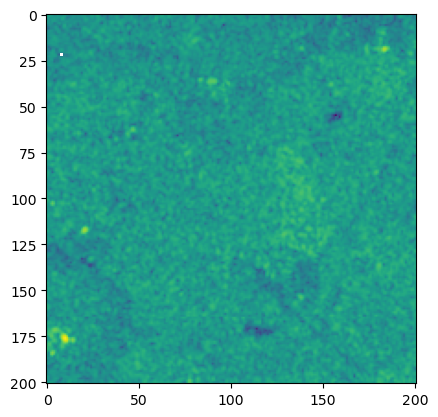

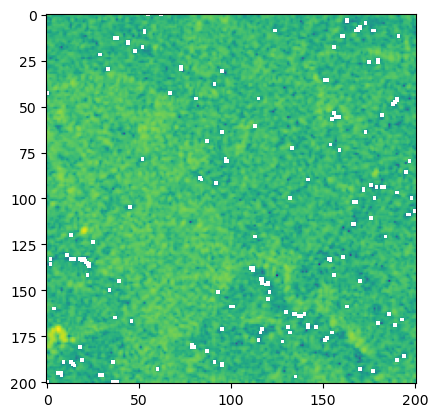

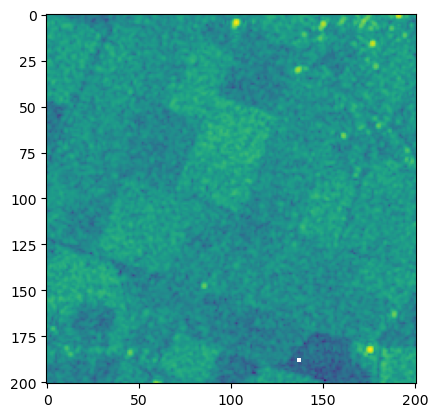

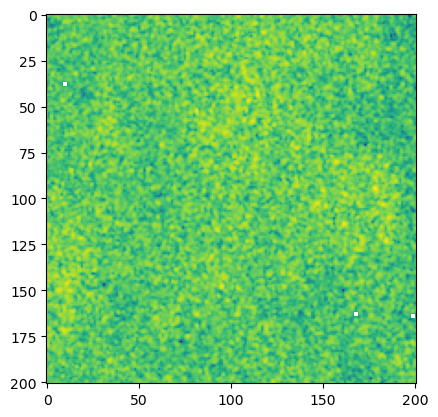

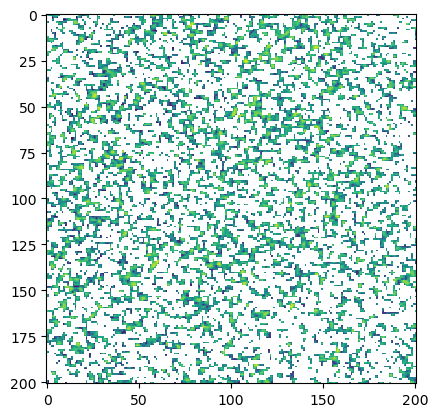

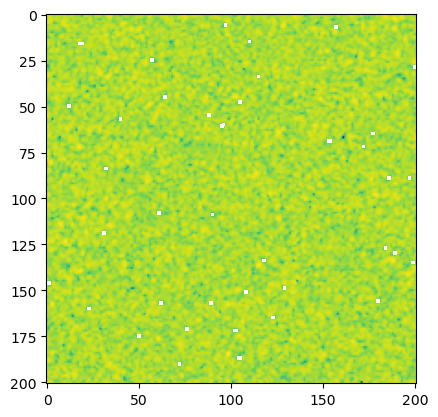

In [6]:
for img in (land_patches[:3] + noland_patches[:3]):
    plt.imshow(10 * np.log10(img))
    plt.show()

/var/folders/_9/vvqgylds56j6qt35q29hhlpm0000gn/T/ipykernel_27449/143220709.py:3: RuntimeWarning: divide by zero encountered in log10
  10 * np.log10(


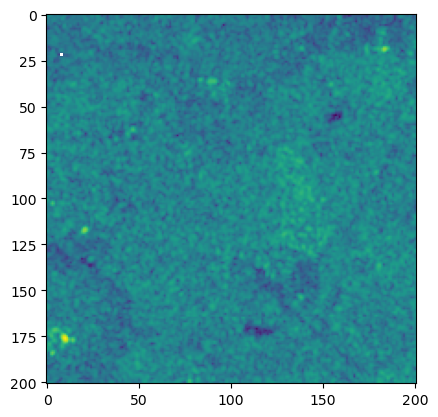

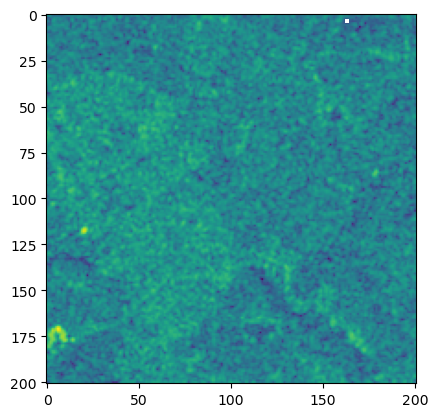

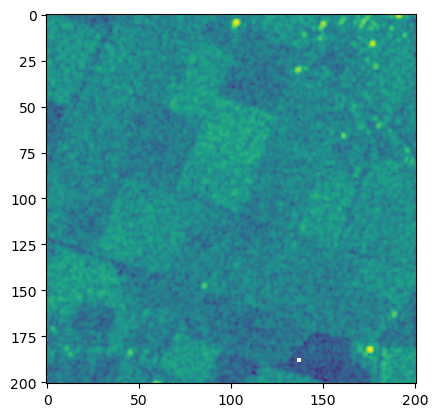

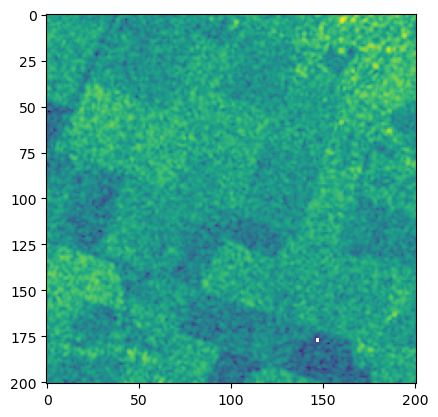

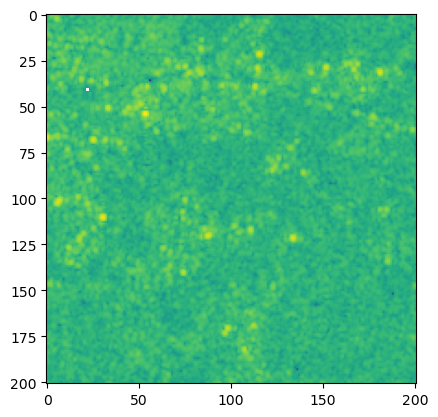

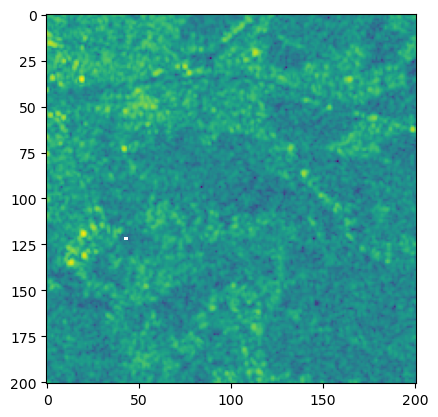

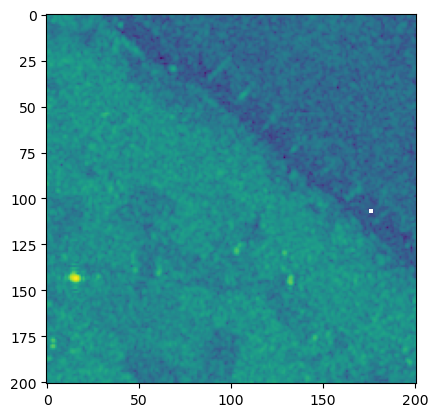

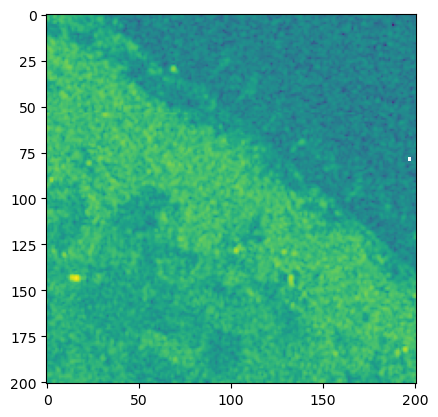

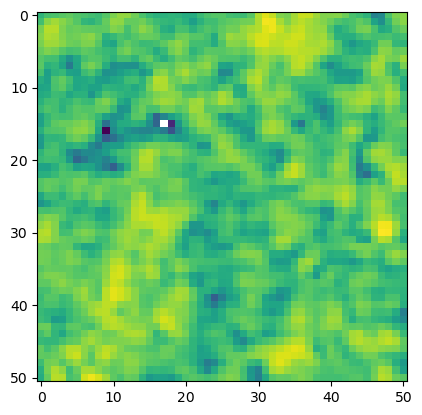

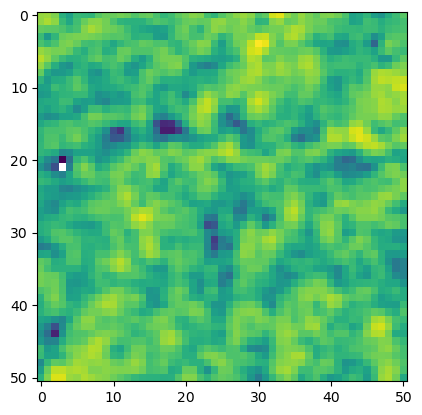

In [55]:
for v in land_patches[:10]:
    plt.imshow(
        10 * np.log10(
            (v - v.min()) / (v.max() - v.min())
         )
    )
    plt.show()

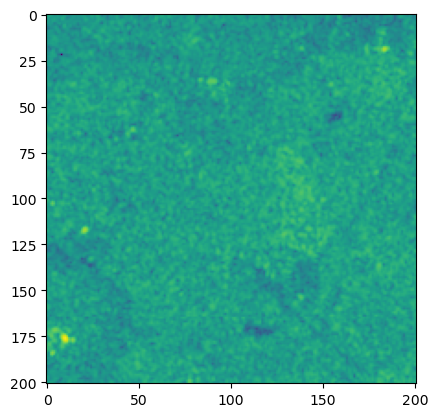

In [103]:
v = 10 * np.log10(land_patches[0] - (land_patches[0].min() * 1.1))
plt.imshow(img_as_ubyte((v - v.min()) / (v.max() - v.min())))

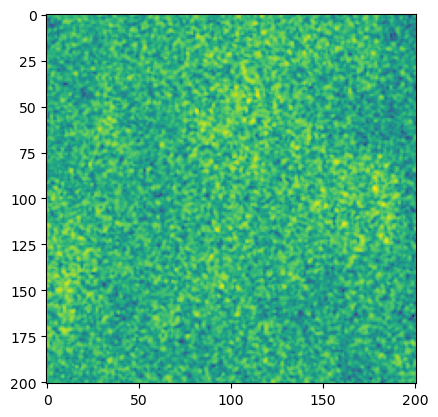

In [98]:
v = 10 * np.log10(noland_patches[0] - (noland_patches[0].min() * 2))
plt.imshow(img_as_ubyte((v - v.min()) / (v.max() - v.min())))

In [20]:
graycoprops(glcm, 'homogeneity')[0, 0]

0.047521617731497386

In [22]:
land_hom_no_dB = []
for i, patch in enumerate(land_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    v = patch#10 * np.log10(patch)
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    land_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])

In [21]:
noland_hom_no_dB = []
for i, patch in enumerate(noland_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    #v = 10 * np.log10(patch)
    v = patch
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    noland_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])

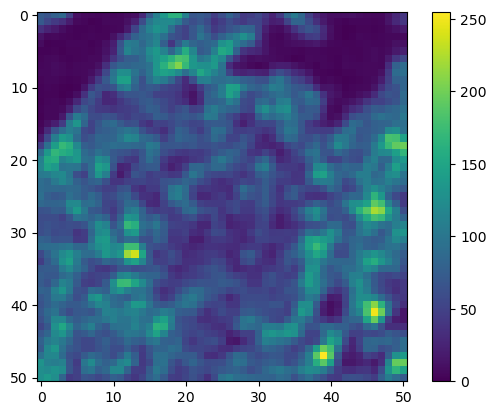

In [28]:
plt.imshow(ubyte)
plt.colorbar()

In [24]:
noland_hom_no_dB

[]

In [5]:
land_dir = './out/homogenuity/land/'
faulty_ds = []

for file_name in os.listdir(land_dir):
    if not file_name.endswith('.nc'): continue 
            
    land_ds = xr.open_dataset(land_dir + file_name)
    if np.isnan(land_ds.sigma0).any():
        faulty_ds.append(land_ds)

[<xarray.Dataset>
 Dimensions:    (line: 201, sample: 201, pol: 2)
 Coordinates:
   * line       (line) int64 15112 15113 15114 15115 ... 15309 15310 15311 15312
   * sample     (sample) int64 588 589 590 591 592 593 ... 784 785 786 787 788
   * pol        (pol) object 'VV' 'VH'
 Data variables:
     land_mask  (line, sample) int8 ...
     latitude   (line, sample) float64 ...
     longitude  (line, sample) float64 ...
     sigma0     (pol, line, sample) float64 nan nan nan ... 0.02399 0.01861,
 <xarray.Dataset>
 Dimensions:    (line: 201, sample: 201, pol: 2)
 Coordinates:
   * line       (line) int64 11652 11653 11654 11655 ... 11849 11850 11851 11852
   * sample     (sample) int64 583 584 585 586 587 588 ... 779 780 781 782 783
   * pol        (pol) object 'VV' 'VH'
 Data variables:
     land_mask  (line, sample) int8 ...
     latitude   (line, sample) float64 ...
     longitude  (line, sample) float64 ...
     sigma0     (pol, line, sample) float64 nan nan nan ... 0.04736 0.05829,


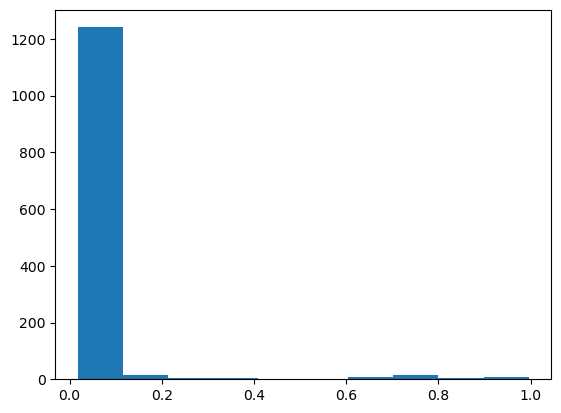

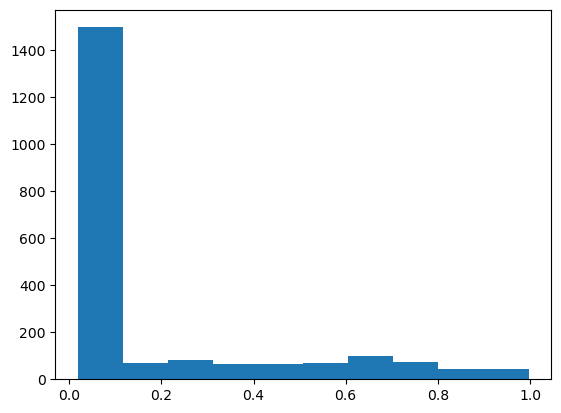

In [26]:
plt.hist(list(filter(lambda x: x !=1, noland_hom)))

plt.show()
plt.hist(list(filter(lambda x: x !=1, land_hom)))

plt.show()

In [16]:
land_hom_no_dB = defaultdict(list)
for i, patch in enumerate(land_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    v = 10 * np.log10(patch)
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    land_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])
    xs.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(graycoprops(glcm, 'correlation')[0, 0])
    
noland_hom_no_dB = defaultdict(list)
for i, patch in enumerate(noland_patches):
    if patch.min() < 0:
        patch -= patch.min() * 2
    v = 10 * np.log10(patch)
    ubyte = img_as_ubyte((v - v.min()) / (v.max() - v.min()))
    
    glcm = graycomatrix(ubyte, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    noland_hom.append(graycoprops(glcm, 'homogeneity')[0, 0])

5

In [ ]:
def no_dB_f